In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution1D,MaxPooling1D
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_L3/malicious_website_dataset.csv")

In [ ]:
random_df=df.sample(frac=1)
random_df.reset_index(drop=True,inplace=False)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,B0_298,47,8,iso-8859-1,Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/0....,479.0,CA,ON,18/10/2002 0:00,17/10/2016 0:00,...,7,8,3007,35,29,23628,3335,35,4.0,0
1,B0_330,30,6,UTF-8,nginx,8751.0,US,FL,30/04/2016 0:00,04/10/2016 0:00,...,2,6,1528,19,17,5586,1860,19,4.0,0
2,M4_26,100,20,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,02/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
3,B0_724,45,10,UTF-8,mw2233.codfw.wmnet,NaN,US,CA,13/01/2001 0:12,12/12/2015 10:16,...,29,2,5852,42,39,37285,6460,42,8.0,0
4,B0_277,44,9,UTF-8,mw2190.codfw.wmnet,NaN,US,CA,13/01/2001 0:12,12/12/2015 10:16,...,32,2,5805,45,41,40585,6413,45,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,B0_674,59,12,utf-8,nginx,162.0,BS,New Providence,06/11/2007 0:00,01/10/2016 0:00,...,12,5,3142,30,24,7684,3746,30,8.0,0
1777,B0_2230,37,8,UTF-8,Apache,1840.0,US,CA,11/09/1997 4:00,09/12/2015 14:43,...,5,5,648,8,11,739,648,8,0.0,0
1778,B0_382,82,13,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,Florida,02/10/2007 0:00,20/07/2014 0:00,...,26,6,3286,37,45,28351,3776,37,6.0,0
1779,B0_546,57,13,UTF-8,cloudflare-nginx,NaN,US,NY,13/11/2003 0:00,12/01/2017 0:00,...,7,12,3944,48,40,23329,4404,48,6.0,0


In [ ]:
random_df.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               363
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [ ]:
random_df = random_df.fillna(random_df.mean())

<ipython-input-855-37bad7d3aadc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  random_df = random_df.fillna(random_df.mean())


In [ ]:
random_df.drop(columns=['WHOIS_COUNTRY','WHOIS_STATEPRO','WHOIS_REGDATE','WHOIS_UPDATED_DATE'],inplace=True)

In [ ]:
categ = ['URL','CHARSET','SERVER']
# Encode Categorical Columns
le = LabelEncoder()
random_df[categ] = random_df[categ].apply(le.fit_transform)

In [ ]:
random_df.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [ ]:
X= random_df.iloc[:,:-1]
Y=random_df['Type']

In [ ]:
scaler = Normalizer().fit(X)
X= scaler.transform(X)

In [ ]:
sm = SMOTE(random_state=16,k_neighbors=1)
X_res, y_res = sm.fit_resample(X, Y)
y_res.value_counts()

0    1565
1    1565
Name: Type, dtype: int64

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X_res,y_res, test_size=0.2 , stratify=y_res)
Y_train.value_counts()

0    1096
1    1095
Name: Type, dtype: int64

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


# CNN Model Implementation

In [ ]:
cnn = Sequential()

cnn.add(Convolution1D(128,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1,
                 input_shape=(16, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Dropout(0.5))

cnn.add(LSTM(70))
cnn.add(Dense(2, activation="softmax"))

In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [ ]:
history=cnn.fit(X_train, Y_train, epochs=20,verbose=1,batch_size=500,validation_data=(X_test, Y_test))

Epoch 1/20
5/5 [==============================] - 5s 265ms/step - loss: 0.6912 - accuracy: 0.5445 - val_loss: 0.6907 - val_accuracy: 0.5240
Epoch 2/20
5/5 [==============================] - 0s 95ms/step - loss: 0.6892 - accuracy: 0.5468 - val_loss: 0.6893 - val_accuracy: 0.5453
Epoch 3/20
5/5 [==============================] - 0s 58ms/step - loss: 0.6872 - accuracy: 0.5646 - val_loss: 0.6877 - val_accuracy: 0.5570
Epoch 4/20
5/5 [==============================] - 0s 87ms/step - loss: 0.6854 - accuracy: 0.5710 - val_loss: 0.6861 - val_accuracy: 0.5591
Epoch 5/20
5/5 [==============================] - 0s 53ms/step - loss: 0.6825 - accuracy: 0.5760 - val_loss: 0.6844 - val_accuracy: 0.5591
Epoch 6/20
5/5 [==============================] - 0s 74ms/step - loss: 0.6807 - accuracy: 0.5696 - val_loss: 0.6831 - val_accuracy: 0.5517
Epoch 7/20
5/5 [==============================] - 0s 75ms/step - loss: 0.6789 - accuracy: 0.5723 - val_loss: 0.6805 - val_accuracy: 0.5644
Epoch 8/20
5/5 [==========

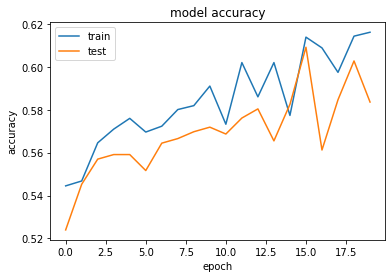

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

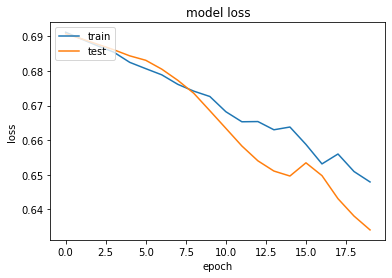

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = cnn.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

30/30 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.5836

Loss: 0.63, Accuracy: 58.36%
